In [3]:
from keras.datasets import cifar10
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()
print('train image shape is: '+str(train_images.shape))
print('train label shape is:'+str(train_labels.shape))
print('test images shape is:',str(test_images.shape))
print('test label shape is:',str(test_labels.shape))

xtrain shape is: (50000, 32, 32, 3)
ytrain shape is:(50000, 1)
xtest shape is； (10000, 32, 32, 3)
y test shape is: (10000, 1)


In [4]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [5]:
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


Train on 33500 samples, validate on 16500 samples
Epoch 1/20
33500/33500 [==============================] - 33s 973us/step - loss: 1.8704 - acc: 0.3192 - val_loss: 1.7949 - val_acc: 0.3478
Epoch 2/20
33500/33500 [==============================] - 34s 1ms/step - loss: 1.5049 - acc: 0.4603 - val_loss: 1.5077 - val_acc: 0.4655
Epoch 3/20
33500/33500 [==============================] - 34s 1ms/step - loss: 1.3343 - acc: 0.5270 - val_loss: 1.4243 - val_acc: 0.4922
Epoch 4/20
33500/33500 [==============================] - 34s 1ms/step - loss: 1.2089 - acc: 0.5732 - val_loss: 1.1993 - val_acc: 0.5813
Epoch 5/20
33500/33500 [==============================] - 33s 997us/step - loss: 1.1181 - acc: 0.6075 - val_loss: 1.1221 - val_acc: 0.6052
Epoch 6/20
33500/33500 [==============================] - 35s 1ms/step - loss: 1.0288 - acc: 0.6378 - val_loss: 1.1846 - val_acc: 0.5878
Epoch 7/20
33500/33500 [==============================] - 35s 1ms/step - loss: 0.9624 - acc: 0.6627 - val_loss: 1.0258 - val

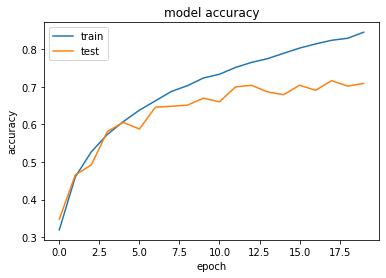

running time is: 0:11:27.493585


In [5]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import layers
from keras import models
#from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.layers import Dropout

#import mnist data
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()

#begin to calculate run time
import datetime
start_time=datetime.datetime.now()

#define the model
model=models.Sequential()
model.add(layers.Conv2D(36,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(layers.Conv2D(72,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
#model.add(Dropout(0.2))
model.add(layers.Conv2D(72,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(72,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

train_images=train_images.reshape((50000,32,32,3))
train_images=train_images.astype('float')/255

test_images=test_images.reshape((10000,32,32,3))
test_images=test_images.astype('float')/255

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

#sgd=SGD(lr=0.01,decay=0.000001,momentum=0.9,nesterov=True)
#model.compile(optimizer=SGD(),loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

#train the model
history=model.fit(train_images,train_labels,validation_split=0.33,epochs=20,batch_size=128)
#model.fit(train_images,train_labels,epochs=10,batch_size=128)

#test the test images and give score
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('test_accuracy is:',test_acc)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()
#calculate the run time
terminal_time=datetime.datetime.now()
running_time=terminal_time-start_time
print("running time is:",running_time)

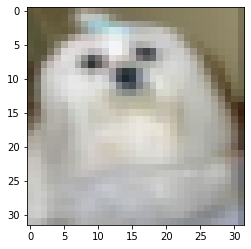

In [19]:
import matplotlib.pyplot as plt
plt.imshow(train_images[20001],cmap='brg')

In [18]:
print(train_labels[20001])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
